# WINCO - Demand Forecasting

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## Import and Process Data

In [2]:
orderinfo = pd.read_csv("data.csv", delimiter=",", encoding='utf-16')
productinfo = pd.read_csv("ProductInformation_clean.txt", delimiter="\t", encoding='utf-16')

In [3]:
df_raw = orderinfo.merge(productinfo, on = 'ItemNo.')
#Calculate Total Unit
df_raw['Total_Order_Unit'] = df_raw['OrderQty'] * df_raw['UnitsRatio']
df_raw['Total_Ship_Unit'] = df_raw['ShipQty'] * df_raw['UnitsRatio']

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330981 entries, 0 to 330980
Data columns (total 23 columns):
OrderDate           330981 non-null object
ShippedDate         330981 non-null object
RequiredDate        214881 non-null object
CustomerID          330981 non-null float64
OrderID             330981 non-null float64
Packing_x           330981 non-null object
Unit_x              330981 non-null object
ItemNo.             330981 non-null object
OrderQty            330981 non-null float64
ShipQty             330981 non-null float64
ShipperType         330981 non-null object
Subcategory         330981 non-null object
Packing_y           330981 non-null object
Unit_y              330981 non-null object
Case_Length         330981 non-null float64
Case_Width          330981 non-null float64
Case_Height         330981 non-null float64
Case_Weight         330981 non-null float64
CaseQty             330981 non-null int64
SubUnit             330981 non-null object
UnitsRatio          33

In [5]:
df_raw.head()

,OrderDate,ShippedDate,RequiredDate,CustomerID,OrderID,Packing_x,Unit_x,ItemNo.,OrderQty,ShipQty,...,Unit_y,Case_Length,Case_Width,Case_Height,Case_Weight,CaseQty,SubUnit,UnitsRatio,Total_Order_Unit,Total_Ship_Unit
0,2016-01-01 00:00:00.000,2016-01-04 00:00:00.000,NaN,52831.0,8411933.0,12/60,PC,18777,5.0,5.0,...,PC,27.17,10.63,8.66,21.61,60,PC,1,5.0,5.0
1,2016-01-01 00:00:00.000,2016-01-04 00:00:00.000,2016-01-05 00:00:00.000,55528.0,8411962.0,12/60,PC,18777,12.0,12.0,...,PC,27.17,10.63,8.66,21.61,60,PC,1,12.0,12.0
2,2016-01-02 00:00:00.000,2016-01-05 00:00:00.000,NaN,52831.0,8412001.0,12/60,PC,18777,12.0,12.0,...,PC,27.17,10.63,8.66,21.61,60,PC,1,12.0,12.0
3,2016-01-03 00:00:00.000,2016-01-04 00:00:00.000,NaN,52831.0,8412038.0,12/60,PC,18777,12.0,12.0,...,PC,27.17,10.63,8.66,21.61,60,PC,1,12.0,12.0
4,2016-01-04 00:00:00.000,2016-01-04 00:00:00.000,2016-01-05 00:00:00.000,53204.0,2354431.0,12/60,PC,18777,24.0,24.0,...,PC,27.17,10.63,8.66,21.61,60,PC,1,24.0,24.0


### Aggregate Per Item in Per OrderDate

In [6]:
df_agg = df_raw.groupby(['ItemNo.', 'OrderDate'])['Total_Order_Unit'].sum().reset_index()

### Add DoW\ Week Number\ Year

In [7]:
import datetime
df_agg['OrderDate_new'] = pd.to_datetime(df_agg['OrderDate'])
df_agg['Order_DoW'] = df_agg['OrderDate_new'].dt.dayofweek
df_agg['Order_week_num'] = df_agg['OrderDate_new'].dt.week
df_agg['Order_month'] = df_agg['OrderDate_new'].dt.month
df_agg['Order_year'] = df_agg['OrderDate_new'].dt.year

In [8]:
df_agg.head()

,ItemNo.,OrderDate,Total_Order_Unit,OrderDate_new,Order_DoW,Order_week_num,Order_month,Order_year
0,10117.0,2015-01-01 00:00:00.000,324.0,2015-01-01,3,1,1,2015
1,10117.0,2015-01-02 00:00:00.000,708.0,2015-01-02,4,1,1,2015
2,10117.0,2015-01-05 00:00:00.000,2196.0,2015-01-05,0,2,1,2015
3,10117.0,2015-01-06 00:00:00.000,41568.0,2015-01-06,1,2,1,2015
4,10117.0,2015-01-07 00:00:00.000,6012.0,2015-01-07,2,2,1,2015


In [9]:
df_agg.tail()

,ItemNo.,OrderDate,Total_Order_Unit,OrderDate_new,Order_DoW,Order_week_num,Order_month,Order_year
57047,19294.0,2016-12-23 00:00:00.000,144.0,2016-12-23,4,51,12,2016
57048,19294.0,2016-12-26 00:00:00.000,442.0,2016-12-26,0,52,12,2016
57049,19294.0,2016-12-27 00:00:00.000,244.0,2016-12-27,1,52,12,2016
57050,19294.0,2016-12-28 00:00:00.000,34.0,2016-12-28,2,52,12,2016
57051,19294.0,2016-12-29 00:00:00.000,51.0,2016-12-29,3,52,12,2016


## Test Seaonality 

In [19]:
df_test = df_agg[(df_agg['ItemNo.']== 19294.0) & (df_agg['Order_year']== 2016)]

In [21]:
df_test_first = df_test[df_test['Order_month'].isin([1,2,3])]

In [22]:
df_test_second = df_test[df_test['Order_month'].isin([4,5,6])]

In [23]:
df_test_third = df_test[df_test['Order_month'].isin([7,8,9])]

In [24]:
df_test_fourth = df_test[df_test['Order_month'].isin([10,11,12])]

In [31]:
a = df_test_first['Total_Order_Unit'].sum()
a

6180.0

In [32]:
b = df_test_second['Total_Order_Unit'].sum()
b

10720.0

In [33]:
c = df_test_third['Total_Order_Unit'].sum()
c

15625.0

In [34]:
d = df_test_fourth['Total_Order_Unit'].sum()
d

10146.0

In [35]:
f = df_test['Total_Order_Unit'].sum()/4
f

10667.75

In [37]:
l =list()
for i in (a,b,c,d):
    l.append(i/f)
    

In [41]:
l

[0.5793161632021748,
 1.0048979400529634,
 1.4646949919148837,
 0.9510909048299782]

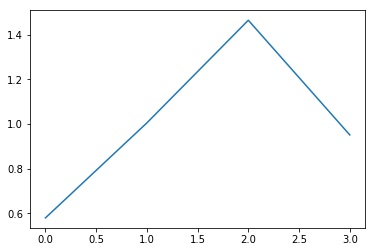

In [40]:
import matplotlib.pyplot as plt 
plt. plot(l)

## Order Frequency

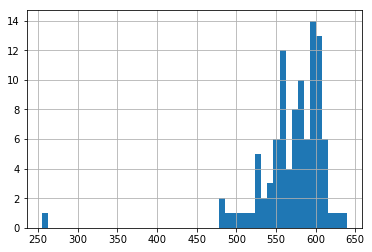

In [11]:
df_agg.groupby('ItemNo.')['OrderDate_new'].nunique().hist(bins=50)

*Most items have order on most days in a year. (>480 days in 2 years 365*2 = 730)
==> frequent ordred items

**Year 2015/2016: items had orders 250-320 days in a year**


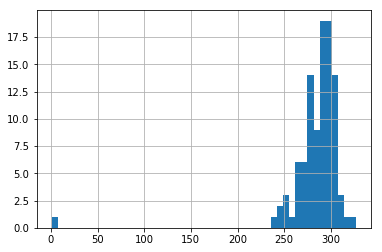

In [12]:
df_agg_2015 = df_agg[df_agg.Order_year == 2015]
df_agg_2015.groupby('ItemNo.')['OrderDate_new'].nunique().hist(bins=50)

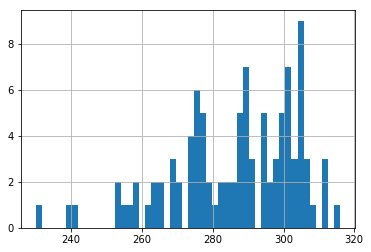

In [13]:
df_agg_2016 = df_agg[df_agg.Order_year == 2016]
df_agg_2016.groupby('ItemNo.')['OrderDate_new'].nunique().hist(bins=50)

## Feature Importance

In [14]:
df_agg['OrderDate_numeric'] = (df_agg['OrderDate_new'] - datetime.datetime(2015, 1, 1, 0, 0)).dt.days

In [15]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57052 entries, 0 to 57051
Data columns (total 9 columns):
ItemNo.              57052 non-null float64
OrderDate            57052 non-null object
Total_Order_Unit     57052 non-null float64
OrderDate_new        57052 non-null datetime64[ns]
Order_DoW            57052 non-null int64
Order_week_num       57052 non-null int64
Order_month          57052 non-null int64
Order_year           57052 non-null int64
OrderDate_numeric    57052 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 3.9+ MB


In [20]:
import xgboost
model = xgboost.XGBRegressor(n_estimators=10000)
x_feature = [ 'OrderDate_numeric', 'ItemNo.', 'Order_year', 'Order_DoW', 'Order_week_num', 'Order_month']
model.fit(df_agg[x_feature], df_agg['Total_Order_Unit'])

KeyboardInterrupt: 

In [ ]:
print(model.feature_importances_)
xgboost.plot_importance(model)

*Has time series pattern; Different itmes have some unique patterns*

In [ ]:
model1 = xgboost.XGBRegressor(n_estimators=10000)
x_feature = [ 'Order_year', 'Order_DoW', 'Order_week_num', 'Order_month']
model1.fit(df_agg[x_feature], df_agg['Total_Order_Unit'])

In [ ]:
print(model1.feature_importances_)
xgboost.plot_importance(model1)

*DoW have some unique patterns*

## DoW Analysis

### Monday

Order_year
2015    Axes(0.125,0.125;0.775x0.755)
2016    Axes(0.125,0.125;0.775x0.755)
Name: Total_Order_Unit, dtype: object

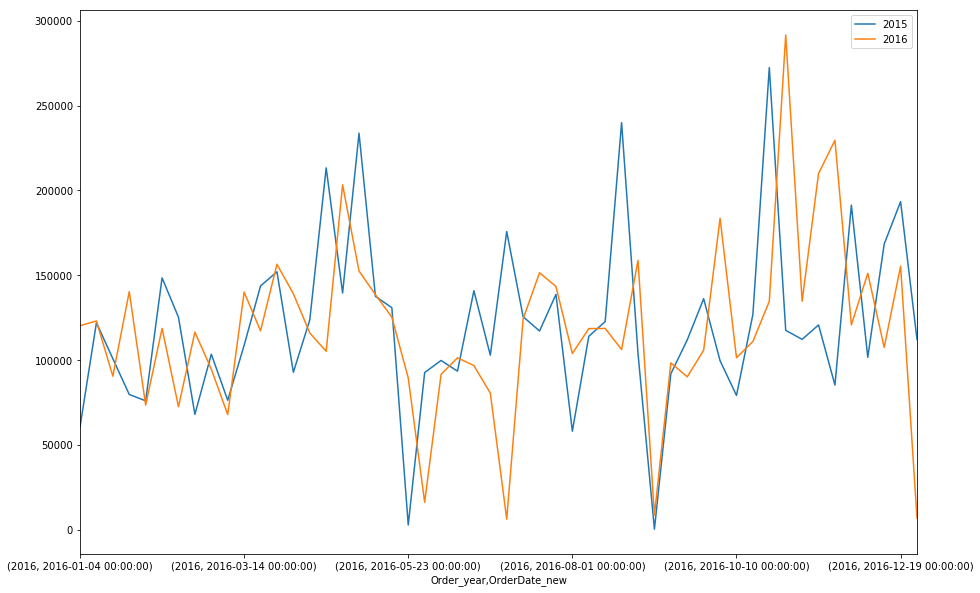

In [22]:
df_agg[df_agg.Order_DoW == 0].set_index('OrderDate_new').groupby(['Order_year',
                                                                  'OrderDate_new'])['Total_Order_Unit'].sum().groupby('Order_year').plot(legend=True,figsize=(15,10))
#figsize=(15,10)

### Tuesday

Order_year
2015    Axes(0.125,0.125;0.775x0.755)
2016    Axes(0.125,0.125;0.775x0.755)
Name: Total_Order_Unit, dtype: object

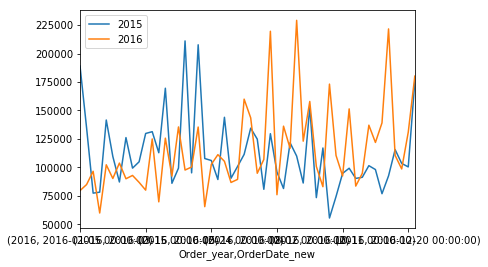

In [21]:
df_agg[df_agg.Order_DoW == 1].set_index('OrderDate_new').groupby(['Order_year',
                                                                  'OrderDate_new'])['Total_Order_Unit'].sum().groupby('Order_year').plot(legend=True,figsize=(15,10))
#figsize=(15,10)

### Wednesday

Order_year
2015    Axes(0.125,0.125;0.775x0.755)
2016    Axes(0.125,0.125;0.775x0.755)
Name: Total_Order_Unit, dtype: object

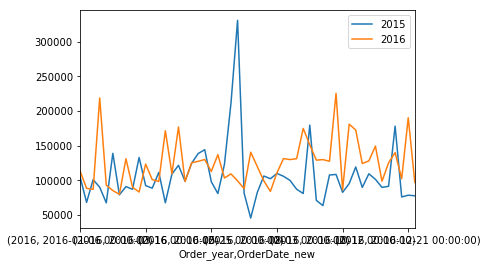

In [22]:
df_agg[df_agg.Order_DoW == 2].set_index('OrderDate_new').groupby(['Order_year',
                                                                  'OrderDate_new'])['Total_Order_Unit'].sum().groupby('Order_year').plot(legend=True)
#figsize=(15,10)

### Thursday

Order_year
2015    Axes(0.125,0.125;0.775x0.755)
2016    Axes(0.125,0.125;0.775x0.755)
Name: Total_Order_Unit, dtype: object

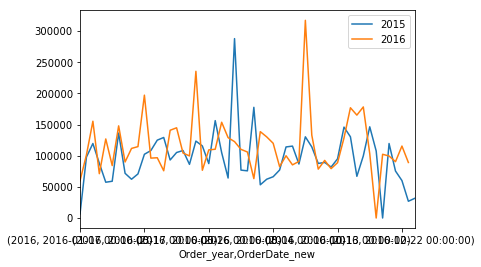

In [23]:
df_agg[df_agg.Order_DoW == 3].set_index('OrderDate_new').groupby(['Order_year',
                                                                  'OrderDate_new'])['Total_Order_Unit'].sum().groupby('Order_year').plot(legend=True)

### Friday

Order_year
2015    Axes(0.125,0.125;0.775x0.755)
2016    Axes(0.125,0.125;0.775x0.755)
Name: Total_Order_Unit, dtype: object

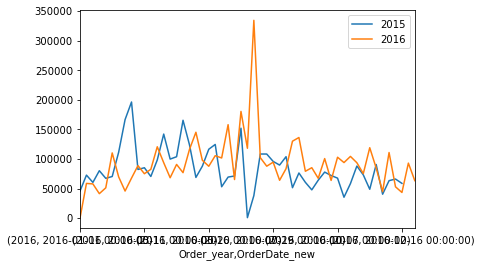

In [24]:
df_agg[df_agg.Order_DoW == 4].set_index('OrderDate_new').groupby(['Order_year',
                                                                  'OrderDate_new'])['Total_Order_Unit'].sum().groupby('Order_year').plot(legend=True)
#figsize=(15,10)

### Saturday

Order_year
2015    Axes(0.125,0.125;0.775x0.755)
2016    Axes(0.125,0.125;0.775x0.755)
Name: Total_Order_Unit, dtype: object

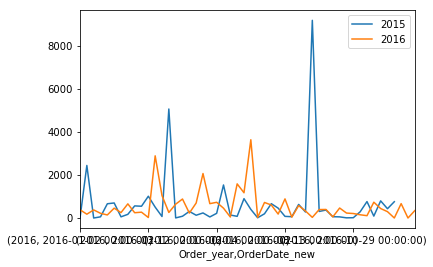

In [25]:
df_agg[df_agg.Order_DoW == 5].set_index('OrderDate_new').groupby(['Order_year',
                                                                  'OrderDate_new'])['Total_Order_Unit'].sum().groupby('Order_year').plot(legend=True)
#figsize=(15,10)

### Sunday

Order_year
2015    Axes(0.125,0.125;0.775x0.755)
2016    Axes(0.125,0.125;0.775x0.755)
Name: Total_Order_Unit, dtype: object

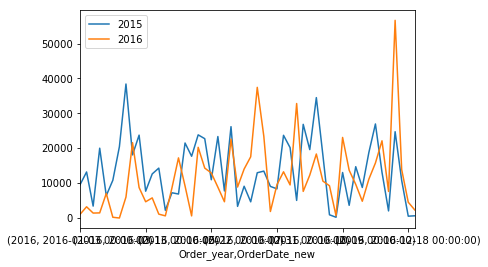

In [26]:
df_agg[df_agg.Order_DoW == 6].set_index('OrderDate_new').groupby(['Order_year',
                                                                  'OrderDate_new'])['Total_Order_Unit'].sum().groupby('Order_year').plot(legend=True)
#figsize=(15,10)

### Each DoW seems to have similar pattern in 2015 and 2016.

In [28]:
df_agg.groupby('Order_DoW')['Total_Order_Unit'].mean()

Order_DoW
0    1248.684986
1    1162.564196
2    1174.269770
3    1109.018666
4     941.702825
5      71.194279
6     214.502291
Name: Total_Order_Unit, dtype: float64

In [29]:
df_agg_2015.groupby('Order_DoW')['Total_Order_Unit'].mean()

Order_DoW
0    1266.290576
1    1155.120064
2    1090.622235
3    1015.822613
4     909.180736
5      78.054455
6     220.306794
Name: Total_Order_Unit, dtype: float64

In [30]:
df_agg_2016.groupby('Order_DoW')['Total_Order_Unit'].mean()

Order_DoW
0    1231.216583
1    1169.872005
2    1256.664462
3    1202.103152
4     972.098569
5      64.822989
6     207.897866
Name: Total_Order_Unit, dtype: float64

*Saturday has lowest demand quantity overall, and lowest variance;
<br> Sunday has much lower demand than weekdays and lower variance as well*

## Month Analysis

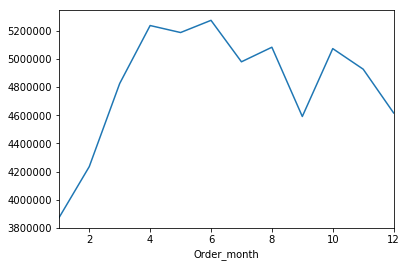

In [34]:
df_agg.set_index('OrderDate_new').groupby('Order_month')['Total_Order_Unit'].sum().plot()df_agg_2015.set_index('OrderDate_new').groupby('Order_month')['Total_Order_Unit'].sum().plot()

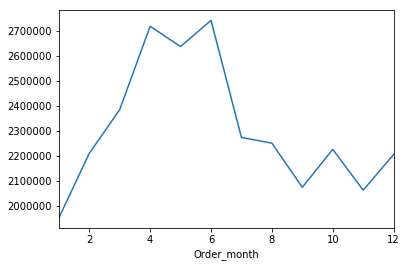

In [35]:
df_agg_2015.set_index('OrderDate_new').groupby('Order_month')['Total_Order_Unit'].sum().plot()

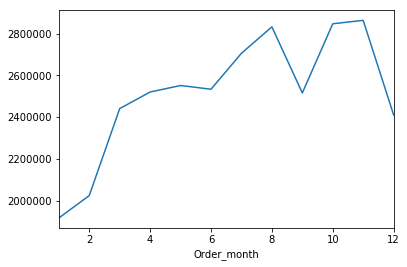

In [36]:
df_agg_2016.set_index('OrderDate_new').groupby('Order_month')['Total_Order_Unit'].sum().plot()

In [37]:
df_agg.set_index('OrderDate_new').groupby('Order_month')['Total_Order_Unit'].sum()

Order_month
1     3869086.0
2     4234735.0
3     4826230.0
4     5238593.0
5     5188767.0
6     5275550.0
7     4980485.0
8     5084158.0
9     4591443.0
10    5074375.0
11    4927963.0
12    4616675.0
Name: Total_Order_Unit, dtype: float64

In [38]:
df_agg_2015.set_index('OrderDate_new').groupby('Order_month')['Total_Order_Unit'].sum()

Order_month
1     1952516.0
2     2210554.0
3     2385053.0
4     2717875.0
5     2636895.0
6     2741569.0
7     2274125.0
8     2251181.0
9     2075214.0
10    2226616.0
11    2063663.0
12    2205976.0
Name: Total_Order_Unit, dtype: float64

In [39]:
df_agg_2016.set_index('OrderDate_new').groupby('Order_month')['Total_Order_Unit'].sum()

Order_month
1     1916570.0
2     2024181.0
3     2441177.0
4     2520718.0
5     2551872.0
6     2533981.0
7     2706360.0
8     2832977.0
9     2516229.0
10    2847759.0
11    2864300.0
12    2410699.0
Name: Total_Order_Unit, dtype: float64

### First quarter has lower demand and Second quarter has highest demand in a year

## Item Demand Std

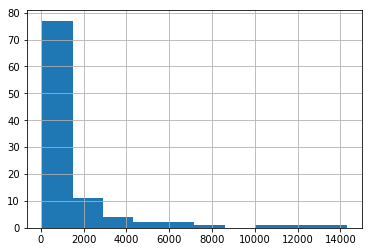

In [40]:
df_agg.groupby('ItemNo.')['Total_Order_Unit'].std().hist()

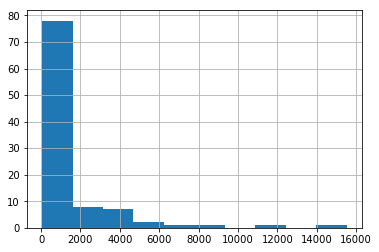

In [41]:
df_agg_2015.groupby('ItemNo.')['Total_Order_Unit'].std().hist()

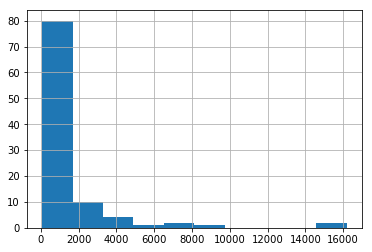

In [42]:
df_agg_2016.groupby('ItemNo.')['Total_Order_Unit'].std().hist()

### Group Items by Std into 5 Groups

In [43]:
ItemStd = df_agg.groupby('ItemNo.')['Total_Order_Unit'].std()
df_Itemstd = pd.DataFrame({'ItemNo.':ItemStd.index, 'std':ItemStd.values})
df_Itemstd['std_group'] = pd.cut(ItemStd.values, 5)

In [44]:
df_Itemstd.groupby('std_group').count()

,ItemNo.,std
std_group,,
"(48.622, 2907.194]",88,88
"(2907.194, 5751.545]",6,6
"(5751.545, 8595.896]",3,3
"(8595.896, 11440.247]",1,1
"(11440.247, 14284.597]",2,2


**90% of the items' std b/w [48.6, 2907.2] **

### Investigate the first std_group 

In [46]:
df_Itemstd.std_group[8]
df_Itemstd_firstgroup= df_Itemstd[df_Itemstd.std_group==df_Itemstd.std_group[8]].copy()
df_Itemstd_firstgroup['std_group_sub'] = pd.cut(df_Itemstd_firstgroup['std'], 30)

In [47]:
df_Itemstd_firstgroup.groupby('std_group_sub').count()

,ItemNo.,std,std_group
std_group_sub,,,
"(60.027, 156.738]",31,31,31
"(156.738, 250.633]",18,18,18
"(250.633, 344.528]",7,7,7
"(344.528, 438.423]",4,4,4
"(438.423, 532.318]",6,6,6
"(532.318, 626.213]",2,2,2
"(626.213, 720.108]",2,2,2
"(720.108, 814.002]",1,1,1
"(814.002, 907.897]",2,2,2


In [48]:
df_Itemstd_firstgroup['std_group_sub2'] = pd.cut(df_Itemstd_firstgroup['std'], 50)

In [49]:
df_Itemstd_firstgroup.groupby('std_group_sub2').count()

,ItemNo.,std,std_group,std_group_sub
std_group_sub2,,,,
"(60.027, 119.18]",19,19,19,19
"(119.18, 175.517]",14,14,14,14
"(175.517, 231.854]",15,15,15,15
"(231.854, 288.191]",4,4,4,4
"(288.191, 344.528]",4,4,4,4
"(344.528, 400.865]",4,4,4,4
"(400.865, 457.202]",1,1,1,1
"(457.202, 513.539]",4,4,4,4
"(513.539, 569.876]",1,1,1,1


In [50]:
df_Itemstd_firstgroup['std_group_sub3'] = pd.cut(df_Itemstd_firstgroup['std'], 80)  # 80 groups

In [51]:
df_Itemstd_firstgroup.groupby('std_group_sub3').count()

,ItemNo.,std,std_group,std_group_sub,std_group_sub2
std_group_sub3,,,,,
"(60.027, 98.054]",10,10,10,10,10
"(98.054, 133.265]",13,13,13,13,13
"(133.265, 168.475]",9,9,9,9,9
"(168.475, 203.686]",10,10,10,10,10
"(203.686, 238.896]",7,7,7,7,7
"(238.896, 274.107]",3,3,3,3,3
"(274.107, 309.317]",2,2,2,2,2
"(309.317, 344.528]",2,2,2,2,2
"(344.528, 379.739]",3,3,3,3,3


** About 48 (half) of the items have std < 232**
<br> 
** 10 items have std < 100, test these 10 first with simple model**

## 10 Items with Most Stable Demand

In [52]:
df_Itemstd_firstgroup.std_group_sub3[16]
df_Itemstd_smallstd = df_Itemstd_firstgroup[df_Itemstd_firstgroup.std_group_sub3 == df_Itemstd_firstgroup.std_group_sub3[16]].copy()
df_Itemstd_smallstd

,ItemNo.,std,std_group,std_group_sub,std_group_sub2,std_group_sub3
16,11597.0,81.591320,"(48.622, 2907.194]","(60.027, 156.738]","(60.027, 119.18]","(60.027, 98.054]"
17,11605.0,85.407449,"(48.622, 2907.194]","(60.027, 156.738]","(60.027, 119.18]","(60.027, 98.054]"
36,14467.0,89.670041,"(48.622, 2907.194]","(60.027, 156.738]","(60.027, 119.18]","(60.027, 98.054]"
40,15275.0,62.843379,"(48.622, 2907.194]","(60.027, 156.738]","(60.027, 119.18]","(60.027, 98.054]"
68,17581.0,78.084861,"(48.622, 2907.194]","(60.027, 156.738]","(60.027, 119.18]","(60.027, 98.054]"
69,17594.0,85.188453,"(48.622, 2907.194]","(60.027, 156.738]","(60.027, 119.18]","(60.027, 98.054]"
72,17698.0,93.540370,"(48.622, 2907.194]","(60.027, 156.738]","(60.027, 119.18]","(60.027, 98.054]"
78,17731.0,87.858640,"(48.622, 2907.194]","(60.027, 156.738]","(60.027, 119.18]","(60.027, 98.054]"
87,17840.0,95.483383,"(48.622, 2907.194]","(60.027, 156.738]","(60.027, 119.18]","(60.027, 98.054]"
94,18515.0,90.413727,"(48.622, 2907.194]","(60.027, 156.738]","(60.027, 119.18]","(60.027, 98.054]"


In [53]:
df_Itemstd_smallstd['ItemNo.']

16    11597.0
17    11605.0
36    14467.0
40    15275.0
68    17581.0
69    17594.0
72    17698.0
78    17731.0
87    17840.0
94    18515.0
Name: ItemNo., dtype: float64

### Check Two Items in These 10

In [54]:
df_sample_ = df_agg[df_agg['ItemNo.'] == 11597.0 ].copy()
df_sample_.sort_values('OrderDate_new', ascending=True, inplace=True)

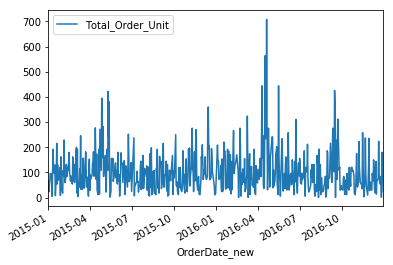

In [56]:
df_sample_.plot(x='OrderDate_new', y='Total_Order_Unit')

**Some big orders, but in general stable**

In [58]:
df_sample_.groupby('Order_DoW')['Total_Order_Unit'].mean()

Order_DoW
0    140.120000
1    118.673077
2    109.460784
3    107.911765
4     64.336842
5      4.333333
6     84.860465
Name: Total_Order_Unit, dtype: float64

Order_DoW
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
2    Axes(0.125,0.125;0.775x0.755)
3    Axes(0.125,0.125;0.775x0.755)
4    Axes(0.125,0.125;0.775x0.755)
5    Axes(0.125,0.125;0.775x0.755)
6    Axes(0.125,0.125;0.775x0.755)
Name: Total_Order_Unit, dtype: object

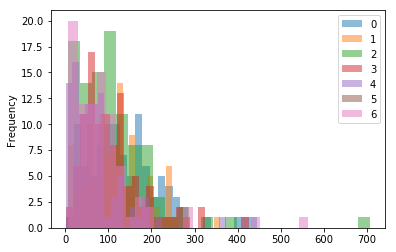

In [61]:
df_sample_[df_sample_['Order_DoW'] <7].groupby('Order_DoW')['Total_Order_Unit'].plot.hist(bins=25, alpha=0.5, legend=True)

** Similar DoW Pattern**

In [62]:
df_sample1 = df_agg[df_agg['ItemNo.'] == 11605.0 ].copy()
df_sample1.sort_values('OrderDate_new', ascending=True, inplace=True)

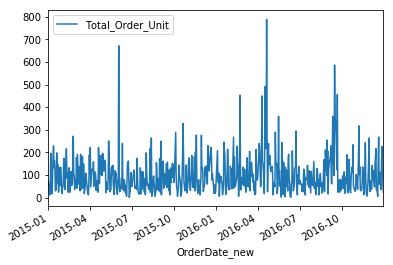

In [64]:
df_sample1.plot(x='OrderDate_new', y='Total_Order_Unit')

*Can check the reason behind similar spikes there*

In [65]:
df_sample1.groupby('Order_DoW')['Total_Order_Unit'].mean()

Order_DoW
0    144.393939
1    125.196078
2    112.471154
3    103.490196
4     51.278351
5      6.000000
6     84.122222
Name: Total_Order_Unit, dtype: float64

Order_DoW
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
2    Axes(0.125,0.125;0.775x0.755)
3    Axes(0.125,0.125;0.775x0.755)
4    Axes(0.125,0.125;0.775x0.755)
5    Axes(0.125,0.125;0.775x0.755)
6    Axes(0.125,0.125;0.775x0.755)
Name: Total_Order_Unit, dtype: object

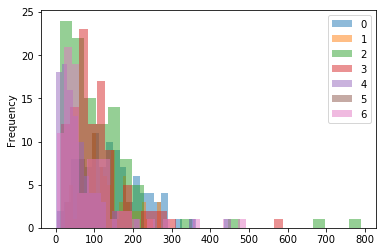

In [66]:
df_sample1[df_sample1['Order_DoW'] <7].groupby('Order_DoW')['Total_Order_Unit'].plot.hist(bins=25, alpha=0.5, legend=True)

### Check All 10

In [71]:
stablelist = list(df_Itemstd_smallstd['ItemNo.'])

In [73]:
df_stable = df_agg[df_agg['ItemNo.'].isin(stablelist) ].copy()

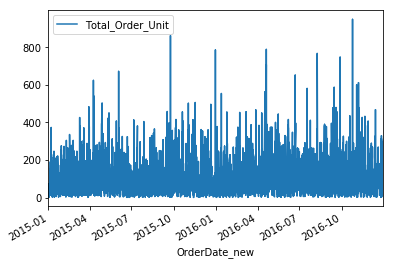

In [75]:
df_stable.plot(x='OrderDate_new', y='Total_Order_Unit')

*see some spikes shown in several items at the same time*

In [76]:
df_stable.groupby('Order_DoW')['Total_Order_Unit'].mean()

Order_DoW
0    151.196624
1    127.998058
2    116.501455
3    113.642507
4     74.802456
5      8.676471
6     59.800971
Name: Total_Order_Unit, dtype: float64

Order_DoW
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
2    Axes(0.125,0.125;0.775x0.755)
3    Axes(0.125,0.125;0.775x0.755)
4    Axes(0.125,0.125;0.775x0.755)
5    Axes(0.125,0.125;0.775x0.755)
6    Axes(0.125,0.125;0.775x0.755)
Name: Total_Order_Unit, dtype: object

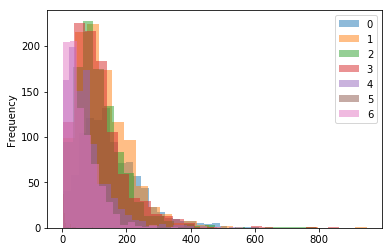

In [77]:
df_stable[df_stable['Order_DoW'] <7].groupby('Order_DoW')['Total_Order_Unit'].plot.hist(bins=25, alpha=0.5, legend=True)

In [78]:
df_stable['Total_Order_Unit'].mean()

107.95283652232293

In [79]:
df_stable['Total_Order_Unit'].std()

85.88334486465118

## Fit Simple Models on Stable Items

Moving Average/ Moving Median / Exponetial MA

In [80]:
stablelist

[11597.0,
 11605.0,
 14467.0,
 15275.0,
 17581.0,
 17594.0,
 17698.0,
 17731.0,
 17840.0,
 18515.0]

In [81]:
dict_of_item = {k: v for k, v in df_agg.groupby('ItemNo.')}

In [83]:
list_stable = []
for i in stablelist:
    list_stable.append(dict_of_item[i])

### Moving Average

In [100]:
def MA_rmse(item):
    import math as m
    
    df_sample = df_agg[df_agg['ItemNo.'] == item].copy()
    df_sample['MA'] = df_sample['Total_Order_Unit'].rolling(window=7).mean()
    df_sample_n = df_sample.iloc[6:,].copy()
    df_sample_n['Error'] = df_sample_n['MA'] - df_sample_n['Total_Order_Unit']
    df_sample_n['Squared_Error'] = df_sample_n['Error'] * df_sample_n['Error'] 
    mse = df_sample_n['Squared_Error'].mean()
    rmse_ma = m.sqrt(mse)

    return rmse_ma

In [101]:
MA_rmse(11597.0)

71.61260300466377

In [102]:
rmse_ma_stable = []

In [103]:
for i in stablelist:
    rmse_i = MA_rmse(i)
    rmse_ma_stable.append(rmse_i)

In [104]:
rmse_ma_stable

[71.61260300466377,
 75.15326174405828,
 82.11702749983709,
 55.70728175707451,
 70.90811923882495,
 76.96143248868647,
 86.63990839554259,
 79.17076630989017,
 86.48790790692195,
 84.18675846144538]

In [107]:
avg_rmse_ma = 0
for i in rmse_ma_stable:
    avg_rmse_ma += i/len(rmse_ma_stable) 

In [108]:
avg_rmse_ma

76.89450668069452

**Average MA rmse for these 10 itmes is 77**

### Moving Median

In [109]:
def MM_rmse(item):
    import math as m
    
    df_sample = df_agg[df_agg['ItemNo.'] == item].copy()
    df_sample['MA'] = df_sample['Total_Order_Unit'].rolling(window=7).median()
    df_sample_n = df_sample.iloc[6:,].copy()
    df_sample_n['Error'] = df_sample_n['MA'] - df_sample_n['Total_Order_Unit']
    df_sample_n['Squared_Error'] = df_sample_n['Error'] * df_sample_n['Error'] 
    mse = df_sample_n['Squared_Error'].mean()
    rmse_mm = m.sqrt(mse)

    return rmse_mm

In [110]:
rmse_MM_stable = []

In [111]:
for i in stablelist:
    rmse_i = MM_rmse(i)
    rmse_MM_stable.append(rmse_i)

In [112]:
rmse_MM_stable

[75.11340686445385,
 79.6946421863404,
 85.54297165752426,
 58.35314645326915,
 75.76445162127085,
 80.32427910191777,
 92.27125112289193,
 83.17010680927774,
 90.66566306199807,
 90.06128415703365]

In [113]:
avg_MM_rmse = 0
for i in rmse_MM_stable:
    avg_MM_rmse += i/len(rmse_MM_stable) 

In [114]:
avg_MM_rmse

81.09612030359776

**MA is better than MM here**

### EWMA

In [116]:
def EWM_rmse(item):
    import math as m
    
    df_sample = df_agg[df_agg['ItemNo.'] == item].copy()
    df_sample['EWMA_ori'] = df_sample['Total_Order_Unit'].ewm(com=0.5).mean()
    df_sample['EWMA'] = df_sample.EWMA_ori.shift(7)  #choose shift 7 here
#     df_sample_n = df_sample.iloc[6:,].copy()
    df_sample['Error'] = df_sample['EWMA'] - df_sample['Total_Order_Unit']
    df_sample['Squared_Error'] = df_sample['Error'] * df_sample['Error'] 
    mse = df_sample['Squared_Error'].mean()
    rmse_ewm = m.sqrt(mse)

    return rmse_ewm

In [117]:
rmse_EWM_stable = []

In [119]:
for i in stablelist:
    rmse_i = EWM_rmse(i)
    rmse_EWM_stable.append(rmse_i)

In [120]:
rmse_EWM_stable

[96.99094992282092,
 103.11151049640968,
 106.34967518360506,
 77.6895218879383,
 95.59165924853744,
 101.8047166932199,
 114.02422306233909,
 107.56451871573012,
 113.65800670517454,
 109.91950788283016]

In [121]:
avg_EWM_rmse = 0
for i in rmse_EWM_stable:
    avg_EWM_rmse += i/len(rmse_EWM_stable) 

In [122]:
avg_EWM_rmse

102.67042897986052

**Performance:  MA > MM> EWM **

### Check MA Prediction

In [125]:
import math as m
    
df_stable1_ma = df_agg[df_agg['ItemNo.'] == 11597.0].copy()
df_stable1_ma['MA'] = df_stable1_ma['Total_Order_Unit'].rolling(window=7).mean()
df_stable1_ma = df_stable1_ma.iloc[6:,].copy()
df_stable1_ma['Error'] = df_stable1_ma['MA'] - df_stable1_ma['Total_Order_Unit']
df_stable1_ma['Squared_Error'] = df_stable1_ma['Error'] * df_stable1_ma['Error'] 
mse = df_stable1_ma['Squared_Error'].mean()
rmse_ma = m.sqrt(mse)

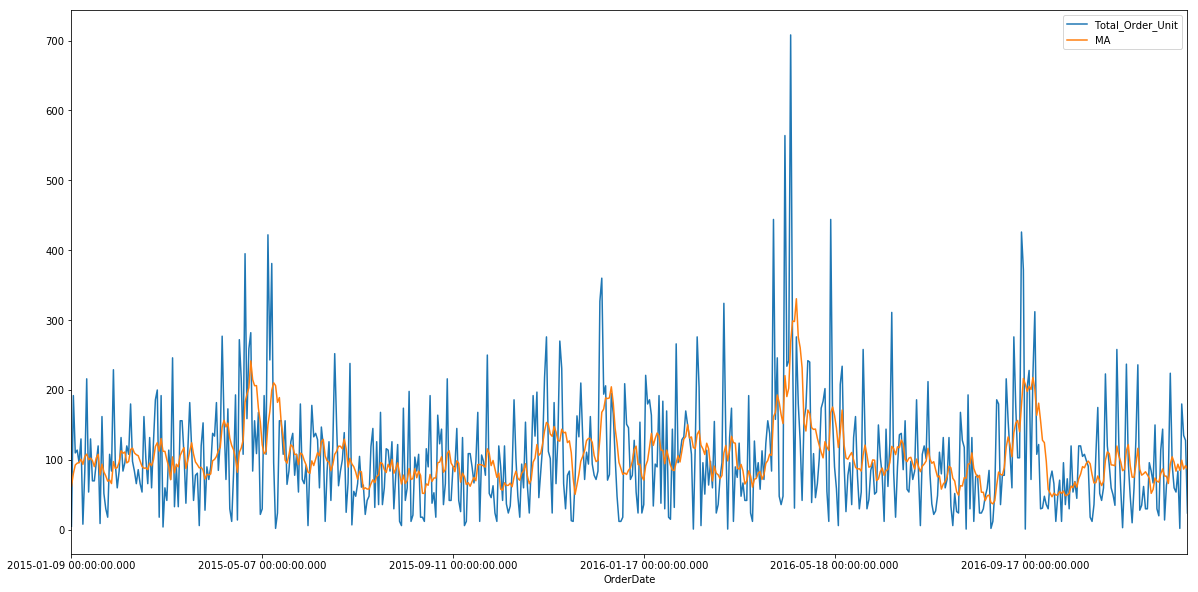

In [128]:
df_stable1_ma.plot(x="OrderDate", y=["Total_Order_Unit", "MA"], figsize=(20,10))

### ARIMA

In [249]:
df_agg

,ItemNo.,OrderDate,Total_Order_Unit,OrderDate_new,Order_DoW,Order_week_num,Order_month,Order_year,OrderDate_numeric
0,10117.0,2015-01-01 00:00:00.000,324.0,2015-01-01,3,1,1,2015,0
1,10117.0,2015-01-02 00:00:00.000,708.0,2015-01-02,4,1,1,2015,1
2,10117.0,2015-01-05 00:00:00.000,2196.0,2015-01-05,0,2,1,2015,4
3,10117.0,2015-01-06 00:00:00.000,41568.0,2015-01-06,1,2,1,2015,5
4,10117.0,2015-01-07 00:00:00.000,6012.0,2015-01-07,2,2,1,2015,6
5,10117.0,2015-01-08 00:00:00.000,5520.0,2015-01-08,3,2,1,2015,7
6,10117.0,2015-01-09 00:00:00.000,2724.0,2015-01-09,4,2,1,2015,8
7,10117.0,2015-01-12 00:00:00.000,9564.0,2015-01-12,0,3,1,2015,11
8,10117.0,2015-01-13 00:00:00.000,3216.0,2015-01-13,1,3,1,2015,12
9,10117.0,2015-01-14 00:00:00.000,3972.0,2015-01-14,2,3,1,2015,13


In [213]:
orders_data = df_agg_2016.copy()

In [255]:
orders_data['Order_week_num1'] = orders_data['OrderDate_new'].dt.strftime('%Y-%U')

In [214]:
orders_data['Order_Date'] = orders_data['OrderDate'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').date())

In [247]:
#orders_data['Order Date'] = orders_data['OrderDate'].apply(lambda x:datetime.datetime.strptime(x,'%y/%m/%d'))

#orders_data['Order Week'] = orders_data['Order_week_num'].astype(str) + '/'+ orders_data['Order_year'].astype(str)
#+ orders_data['Order_Date'].apply(lambda x: x.isocalendar()[1])

orders_data['Week_Year']=orders_data['Order_Date'].apply(lambda x: str(x.isocalendar()[1])+'/'+ str(x.year))

In [257]:
ts_data=orders_data[orders_data['ItemNo.']==11597].copy()
ts_data=pd.DataFrame(ts_data.groupby(['Order_week_num1'])['Total_Order_Unit'].sum())

In [258]:
temp=ts_data['Total_Order_Unit']

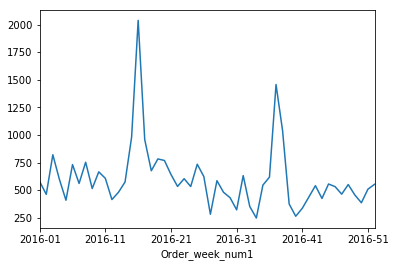

In [259]:
temp.plot(kind='line')

In [260]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib as mp

In [261]:
def test_stationarity(temp):
    rolmean = pd.rolling_mean(temp, window=5)
    rolstd = pd.rolling_std(temp, window=5)

    temp.plot(kind='line',color='grey',label='demand')
    rolmean.plot(kind='line',color='blue',label='rolling mean')
    rolstd.plot(kind='line',color='green',label='rolling std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(temp, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


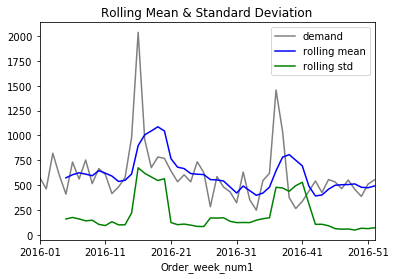

Results of Dickey-Fuller Test:
Test Statistic                 -4.491682
p-value                         0.000204
#Lags Used                      0.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


In [262]:
test_stationarity(temp)

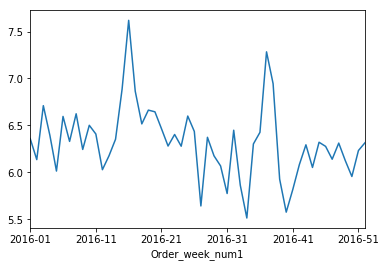

In [263]:
ts_log = np.log(temp)
ts_log.plot(kind='line')

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  """Entry point for launching an IPython kernel.


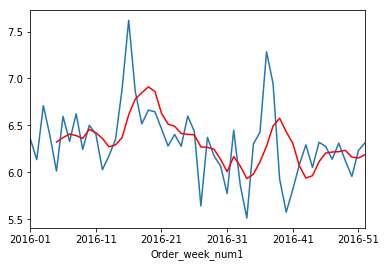

In [264]:
moving_avg = pd.rolling_mean(ts_log,5)
ts_log.plot(kind='line')
moving_avg.plot(kind='line', color='red')
plt.show(block=False)

In [265]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


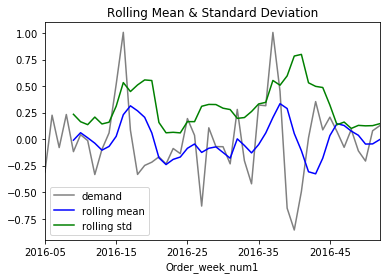

Results of Dickey-Fuller Test:
Test Statistic                 -4.934136
p-value                         0.000030
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [266]:
test_stationarity(ts_log_moving_avg_diff)

In [267]:
ts_log_diff = ts_log - ts_log.shift()

In [268]:
ts_log_diff.dropna(inplace=True)


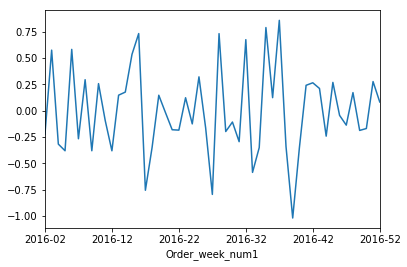

In [269]:
ts_log_diff.plot(kind='line')

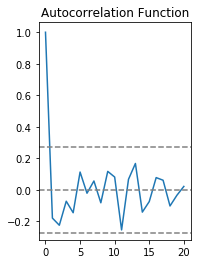

In [270]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


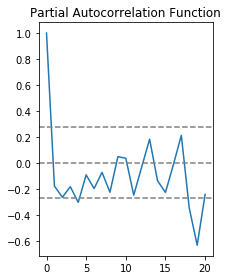

In [271]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


In [272]:
from statsmodels.tsa.arima_model import ARIMA
x=np.array(ts_log)
x=ts_log.as_matrix()

In [273]:
model= ARIMA(x, order=(1, 1, 1)) 

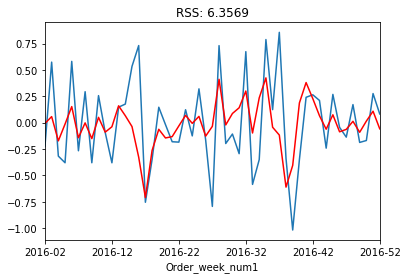

In [274]:
results_ARIMA = model.fit(disp=-1)  
#plt.plot(ts_log_diff)
ts_log_diff.plot(kind='line')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


In [275]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()


0   -0.006991
1    0.058196
2   -0.172046
3   -0.013034
4    0.153018
dtype: float64

In [276]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

0   -0.006991
1    0.051205
2   -0.120841
3   -0.133875
4    0.019143
dtype: float64

In [277]:
ts_log_diff_cumsum=ts_log_diff.cumsum()
ts_log_diff_cumsum.head()

Order_week_num1
2016-02   -0.224009
2016-03    0.350949
2016-04    0.034017
2016-05   -0.345859
2016-06    0.236207
Name: Total_Order_Unit, dtype: float64

In [278]:
predictions_ARIMA_log = pd.Series(ts_log[0], index=ts_log.index)
predictions_ARIMA_diff_cumsum=pd.Series(predictions_ARIMA_diff_cumsum)
predictions_ARIMA_diff_cumsum.index=ts_log.index[1:52]

In [279]:
predictions_ARIMA_log = pd.Series(ts_log[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()


Order_week_num1
2016-01    6.359574
2016-02    6.352582
2016-03    6.410779
2016-04    6.238733
2016-05    6.225699
dtype: float64

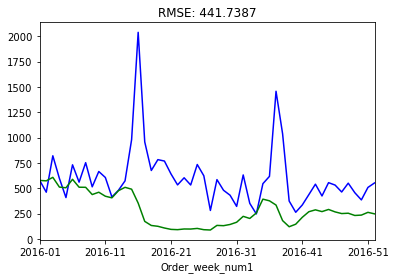

In [280]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
temp.plot(kind='line',color='blue')
predictions_ARIMA.plot(kind='line',color='green')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-temp)**2)/len(ts_data)))


## Facebook Prophet

In [281]:
from fbprophet import Prophet
plt.style.use('seaborn')
%matplotlib inline

In [282]:
df_sample_p = df_agg[df_agg['ItemNo.'] == 11597].copy()

In [288]:
Item_sum = df_sample_p.groupby('OrderDate').sum()
Item_sum.reset_index(inplace=True)

In [290]:
Item_sum['OrderDate'] = pd.to_datetime(Item_sum['OrderDate'])

In [299]:
ItemPro = Item_sum.sort_values('OrderDate') # This now sorts in dat
ItemPro = ItemPro.rename(columns={'OrderDate': 'ds','Total_Order_Unit': 'y'})


In [302]:
ItemPro = ItemPro[['ds','y']].copy()
ItemPro['y'] = np.log(ItemPro['y'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [320]:
min_exce = ItemPro['y'].min()

In [321]:
ItemPro = ItemPro.loc[(ItemPro['y'] != texce)]

In [323]:
#from sklearn.model_selection import train_test_split
rows = ItemPro.count()['ds']
train=ItemPro.head(m.ceil(rows*0.75))

In [324]:
my_model = Prophet(interval_width=0.95)
my_model.fit(train)
future_dates = my_model.make_future_dataframe(periods=12,freq='W',include_history=True)
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
448,2016-08-21,1.395320,0.958319,1.862143
449,2016-08-28,1.395981,0.942442,1.860547
450,2016-09-04,1.396641,0.922133,1.841267
451,2016-09-11,1.397301,0.942253,1.840992
452,2016-09-18,1.397961,0.931499,1.844927


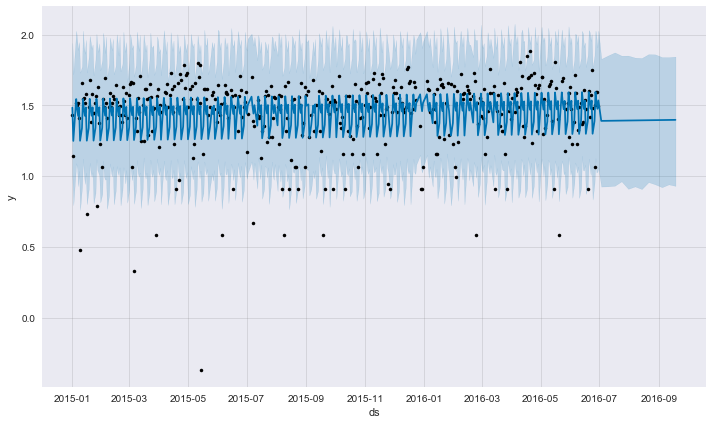

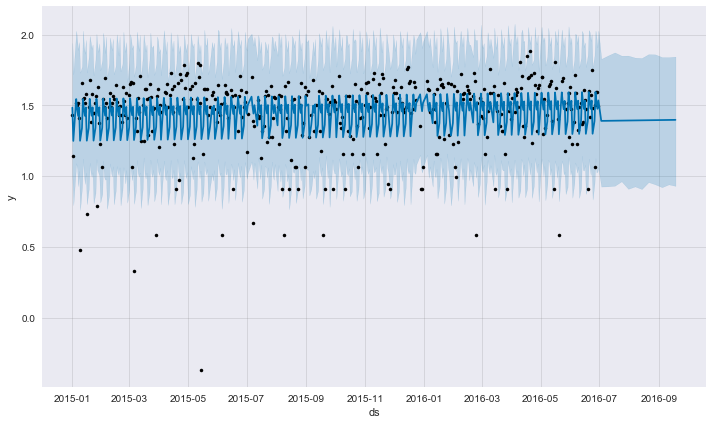

In [325]:
my_model.plot(forecast,uncertainty=True)

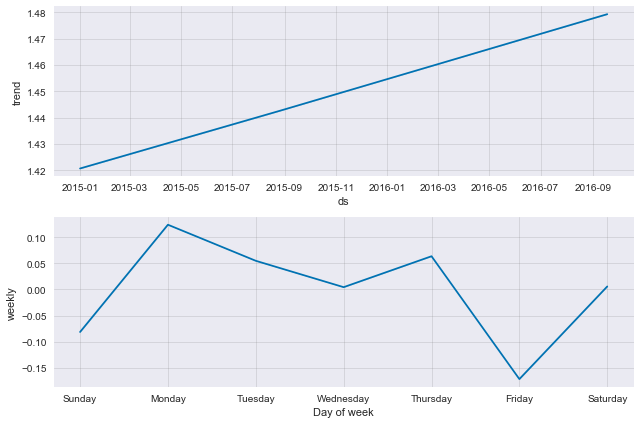

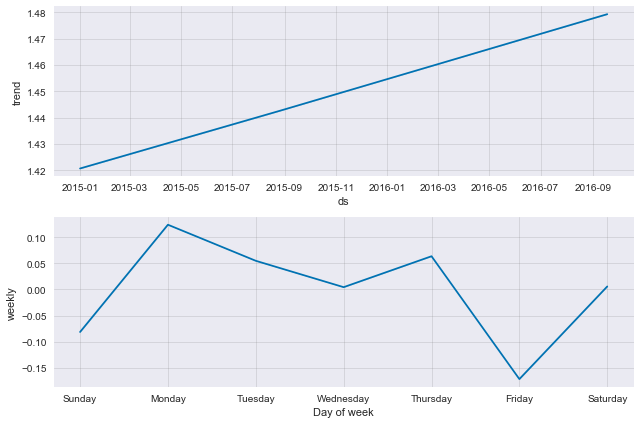

In [326]:
my_model.plot_components(forecast)

In [327]:
my_model_1 = Prophet(interval_width=0.95)
my_model_1.fit(ItemPro)
future_dates = my_model_1.make_future_dataframe(periods=12,freq='W',include_history=True)
forecast = my_model_1.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
595,2017-02-19,1.346535,0.904002,1.826292
596,2017-02-26,1.346211,0.882063,1.833810
597,2017-03-05,1.345887,0.837859,1.841137
598,2017-03-12,1.345562,0.900851,1.823246
599,2017-03-19,1.345238,0.869496,1.824651


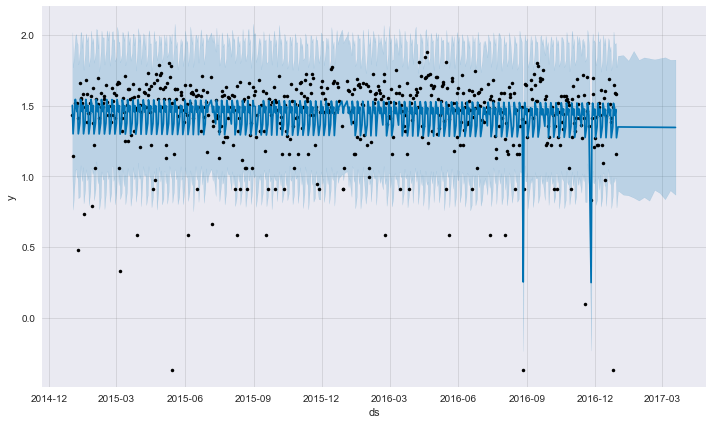

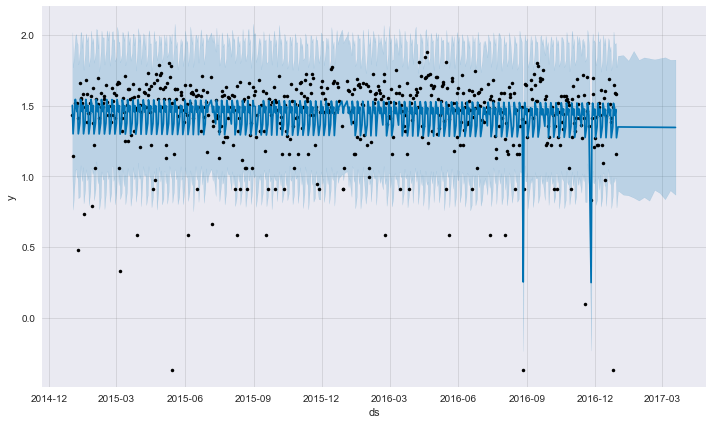

In [329]:
my_model_1.plot(forecast,uncertainty=True)

## A Naive Policy

Navie Policy: Order fixed amount of goods whenever the inventory is below a certain amount 

Extend:
* Order an amount of f(x), where x is the days after the last ordering date
* Order a fixed amount whenver the inventory below a amount f(x) where f(x) is a function involving the odering information for last x days

Goals:
* Minimize the variance of inventory amount.
* Minimize the occurence of shortage
* Minimize the quantity of shortage

In [340]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330981 entries, 0 to 330980
Data columns (total 23 columns):
OrderDate           330981 non-null object
ShippedDate         330981 non-null object
RequiredDate        214881 non-null object
CustomerID          330981 non-null float64
OrderID             330981 non-null float64
Packing_x           330981 non-null object
Unit_x              330981 non-null object
ItemNo.             330981 non-null object
OrderQty            330981 non-null float64
ShipQty             330981 non-null float64
ShipperType         330981 non-null object
Subcategory         330981 non-null object
Packing_y           330981 non-null object
Unit_y              330981 non-null object
Case_Length         330981 non-null float64
Case_Width          330981 non-null float64
Case_Height         330981 non-null float64
Case_Weight         330981 non-null float64
CaseQty             330981 non-null int64
SubUnit             330981 non-null object
UnitsRatio          33

In [341]:
ITEM = 11597
df_sample_np = df_raw[df_raw["ItemNo."] == ITEM].copy()
#df_sample_np["OrderDate"] = df_sample_np["OrderDate"].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

In [342]:
# Group by days
grouped = df_sample_np.groupby("OrderDate")
summary = list(grouped.agg({"Total_Order_Unit":"sum"})["Total_Order_Unit"])

(array([ 226.,  223.,   91.,   38.,    4.,    5.,    3.,    1.,    0.,    1.]),
 array([   1. ,   71.7,  142.4,  213.1,  283.8,  354.5,  425.2,  495.9,
         566.6,  637.3,  708. ]),
 <a list of 10 Patch objects>)

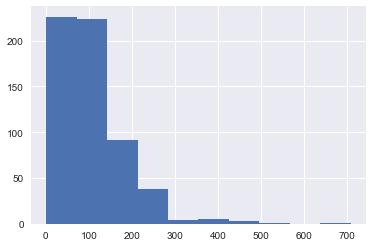

In [343]:
# Distribution
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(summary)

#### Here we fit the data to a distribution

In [344]:
import scipy.stats
import scipy

occr = [[x,summary.count(x)] for x in summary]
occr = pd.DataFrame(occr)
occr.drop_duplicates(subset = [0])
occr = occr.set_index(0)
occr = occr.sort_index()

(-25.54564786643342, 108.61665332263216)
(0.99999999987922006, 103.64351989656416)


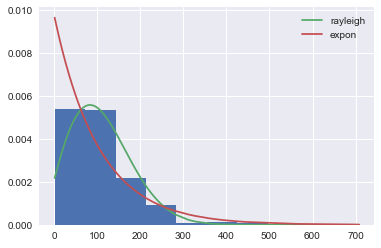

In [345]:
plt.clf()
size = len(summary)
x = scipy.arange(size)
y = summary
h = plt.hist(y, normed = True)

dist_names = ['rayleigh', 'expon',]

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    print(param)
    pdf_fitted = dist.pdf(occr.index, *param[:-2], loc=param[-2], scale=param[-1]) 
    plt.plot(occr.index,pdf_fitted, label=dist_name)

plt.legend(loc='upper right')
plt.show()

Assume it is exponential with $\lambda = \frac{1}{105} $. // mean = 105

 fullfillment ratio: 99.5%
 Current: 96%

np.mean(summary) # should be $\lambda$

### Shortage Analysis

In [346]:
print("Shortage Rate: ", (df_sample_np[df_sample_np["ShipQty"]==0].shape[0])/(df_sample_np.shape[0]))
df_sample_np[df_sample_np["ShipQty"]==0] 

Shortage Rate:  0.006207508128879693


,OrderDate,ShippedDate,RequiredDate,CustomerID,OrderID,Packing_x,Unit_x,ItemNo.,OrderQty,ShipQty,...,Unit_y,Case_Length,Case_Width,Case_Height,Case_Weight,CaseQty,SubUnit,UnitsRatio,Total_Order_Unit,Total_Ship_Unit
215625,2016-06-06 00:00:00.000,2016-06-14 00:00:00.000,NaN,54315.0,2391949.0,6,PC,11597,12.0,0.0,...,PC,22.83,13.58,5.91,14.5,6,PC,1,12.0,0.0
215637,2016-06-07 00:00:00.000,2016-06-09 00:00:00.000,2016-06-08 00:00:00.000,52641.0,2391974.0,6,PC,11597,6.0,0.0,...,PC,22.83,13.58,5.91,14.5,6,PC,1,6.0,0.0
215647,2016-06-07 00:00:00.000,2016-06-15 00:00:00.000,NaN,52824.0,2392241.0,6,PC,11597,8.0,0.0,...,PC,22.83,13.58,5.91,14.5,6,PC,1,8.0,0.0
215650,2016-06-06 00:00:00.000,2016-06-14 00:00:00.000,2016-06-09 00:00:00.000,54701.0,2391592.0,6,PC,11597,24.0,0.0,...,PC,22.83,13.58,5.91,14.5,6,PC,1,24.0,0.0
215654,2016-06-09 00:00:00.000,2016-06-13 00:00:00.000,2016-06-13 00:00:00.000,52656.0,2392869.0,6,PC,11597,12.0,0.0,...,PC,22.83,13.58,5.91,14.5,6,PC,1,12.0,0.0
215655,2016-06-09 00:00:00.000,2016-06-10 00:00:00.000,NaN,52558.0,2392870.0,6,PC,11597,12.0,0.0,...,PC,22.83,13.58,5.91,14.5,6,PC,1,12.0,0.0
215656,2016-06-12 00:00:00.000,2016-06-14 00:00:00.000,2016-06-14 00:00:00.000,54315.0,2393343.0,6,PC,11597,60.0,0.0,...,PC,22.83,13.58,5.91,14.5,6,PC,1,60.0,0.0
215661,2016-06-09 00:00:00.000,2016-06-15 00:00:00.000,NaN,51169.0,2393048.0,6,PC,11597,6.0,0.0,...,PC,22.83,13.58,5.91,14.5,6,PC,1,6.0,0.0
215662,2016-06-08 00:00:00.000,2016-06-15 00:00:00.000,NaN,53316.0,2392480.0,6,PC,11597,12.0,0.0,...,PC,22.83,13.58,5.91,14.5,6,PC,1,12.0,0.0
215663,2016-06-08 00:00:00.000,2016-06-13 00:00:00.000,NaN,54870.0,2392523.0,6,PC,11597,12.0,0.0,...,PC,22.83,13.58,5.91,14.5,6,PC,1,12.0,0.0


### Stable Items
11597 
11605 
14467 
15275 
17581 
17594 
17698 
17731
17840
18515

### Policy Builder


In [350]:
from datetime import timedelta
table = grouped.agg({"Total_Order_Unit":"sum"})

In [355]:
# VARIABLES
MIN = 1800 # Q(75) * 12
REFILL = 11200 # Sigma^2
LEAD = str(timedelta(days = 12))

# Initialization
inv = 2000 # initialization = REFILL
refill_schedules = []
shortage = 0

def refill(day):
    global refill_schedules
    day = str(day)
    if refill_schedules == []:
        refill_schedules.append(day+LEAD)
        return 1
    if day > refill_schedules[-1]: # You don't want refill multiple times for one shortage
        refill_schedules.append(day+LEAD)
        return 1
    return 0
    
def audit(day, inv): # day: current date, inv = current inventory
    ref = 0
    if refill_schedules != []:
        if day >= refill_schedules[-1]:
            inv += REFILL
            del refill_schedules[-1]
    if inv < MIN:
        ref = refill(day)
    return ref, inv

# Duplicated table
copy = table.copy()
copy["Inventory"] = np.zeros(copy.shape[0])
copy["Shortage"] = np.zeros(copy.shape[0], dtype = bool)
copy["Refill"] = np.zeros(copy.shape[0], dtype = bool)

# Simulator
for day in copy.index:
    inv -= copy["Total_Order_Unit"].loc[day]    
    if inv < 0:
        copy["Shortage"].loc[day] = True
        global shortage
        shortage += -inv
        inv = 0 
    copy["Inventory"].loc[day] = inv
    copy["Refill"].loc[day], inv = audit(day, inv)

print("Occurence rate: " , sum(copy["Shortage"])/copy.shape[0])
print("Shortage rate: " ,shortage/sum(copy["Total_Order_Unit"]))
print("Maximum Inventory occupation: ", max(copy["Inventory"]))
print("Average Inventory occupation: ", np.mean(copy["Inventory"]))
copy 

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Occurence rate:  0.0
Shortage rate:  0.0
Maximum Inventory occupation:  12880.0
Average Inventory occupation:  7603.7246621621625


,Total_Order_Unit,Inventory,Shortage,Refill
OrderDate,,,,
2015-01-01 00:00:00.000,66.0,1934.0,False,False
2015-01-02 00:00:00.000,23.0,1911.0,False,False
2015-01-05 00:00:00.000,96.0,1815.0,False,False
2015-01-06 00:00:00.000,90.0,1725.0,False,True
2015-01-07 00:00:00.000,96.0,1629.0,False,False
2015-01-08 00:00:00.000,60.0,12769.0,False,False
2015-01-09 00:00:00.000,5.0,12764.0,False,False
2015-01-11 00:00:00.000,192.0,12572.0,False,False
2015-01-12 00:00:00.000,110.0,12462.0,False,False


In [356]:
copy[copy["Shortage"] == True]

,Total_Order_Unit,Inventory,Shortage,Refill
OrderDate,,,,


In [ ]:
copy.to_csv("temp.csv")

In [1]:
df_agg

NameError: name 'df_agg' is not defined